In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np

In [17]:
from pandarallel import pandarallel
import multiprocessing

num_processors = multiprocessing.cpu_count()
print(f'Available CPUs: {num_processors}')

pandarallel.initialize(nb_workers=num_processors-6, use_memory_fs=False, progress_bar=True)

Available CPUs: 16
INFO: Pandarallel will run on 10 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.


In [8]:
from helper.utils import read_jsonl

TRAIN_JSONL_PATH = "data_raw/train.jsonl"
EVAL_JSONL_PATH = "data_raw/dev.jsonl"
TEST_JSONL_PATH = "data_raw/test.jsonl"

train_df = read_jsonl(TRAIN_JSONL_PATH)
eval_df = read_jsonl(EVAL_JSONL_PATH)
test_df = read_jsonl(TEST_JSONL_PATH)

In [11]:
train_df["dataset"] = "train"
eval_df["dataset"] = "eval"
test_df["dataset"] = "test"

df = pd.concat([train_df, eval_df, test_df], ignore_index=True)
df.head()

,id,img,label,text,dataset
0,42953,img/42953.png,0.0,its their character not their color that matters,train
1,23058,img/23058.png,0.0,don't be afraid to love again everyone is not ...,train
2,13894,img/13894.png,0.0,putting bows on your pet,train
3,37408,img/37408.png,0.0,i love everything and everybody! except for sq...,train
4,82403,img/82403.png,0.0,"everybody loves chocolate chip cookies, even h...",train


In [23]:
df["label"] = df["label"].astype(int)

IntCastingNaNError: Cannot convert non-finite values (NA or inf) to integer

In [18]:
import nltk
# nltk.download('punkt')
df["sentence_count"] = df["text"].parallel_apply(lambda t: len(nltk.sent_tokenize(t)))
df["word_count"] = df["text"].parallel_apply(lambda t: len(nltk.word_tokenize(t)))

In [13]:
df

,id,img,label,text,dataset
0,42953,img/42953.png,0.0,its their character not their color that matters,train
1,23058,img/23058.png,0.0,don't be afraid to love again everyone is not ...,train
2,13894,img/13894.png,0.0,putting bows on your pet,train
3,37408,img/37408.png,0.0,i love everything and everybody! except for sq...,train
4,82403,img/82403.png,0.0,"everybody loves chocolate chip cookies, even h...",train
...,...,...,...,...,...
9995,3869,img/03869.png,NaN,a mother's love for the child is a divine thing,test
9996,23817,img/23817.png,NaN,sea monkeys,test
9997,56280,img/56280.png,NaN,little miss muffet sat on her tuffet,test
9998,29384,img/29384.png,NaN,they're in a row,test


#### Word Count by Dataset

/opt/anaconda3/envs/amd_gpu/lib/python3.8/site-packages/seaborn/distributions.py:416: UserWarning: `bins` cannot be 'auto' when using weights. Setting `bins=10`, but you will likely want to adjust.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/envs/amd_gpu/lib/python3.8/site-packages/seaborn/distributions.py:416: UserWarning: `bins` cannot be 'auto' when using weights. Setting `bins=10`, but you will likely want to adjust.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/envs/amd_gpu/lib/python3.8/site-packages/seaborn/distributions.py:416: UserWarning: `bins` cannot be 'auto' when using weights. Setting `bins=10`, but you will likely want to adjust.
  warnings.warn(msg, UserWarning)


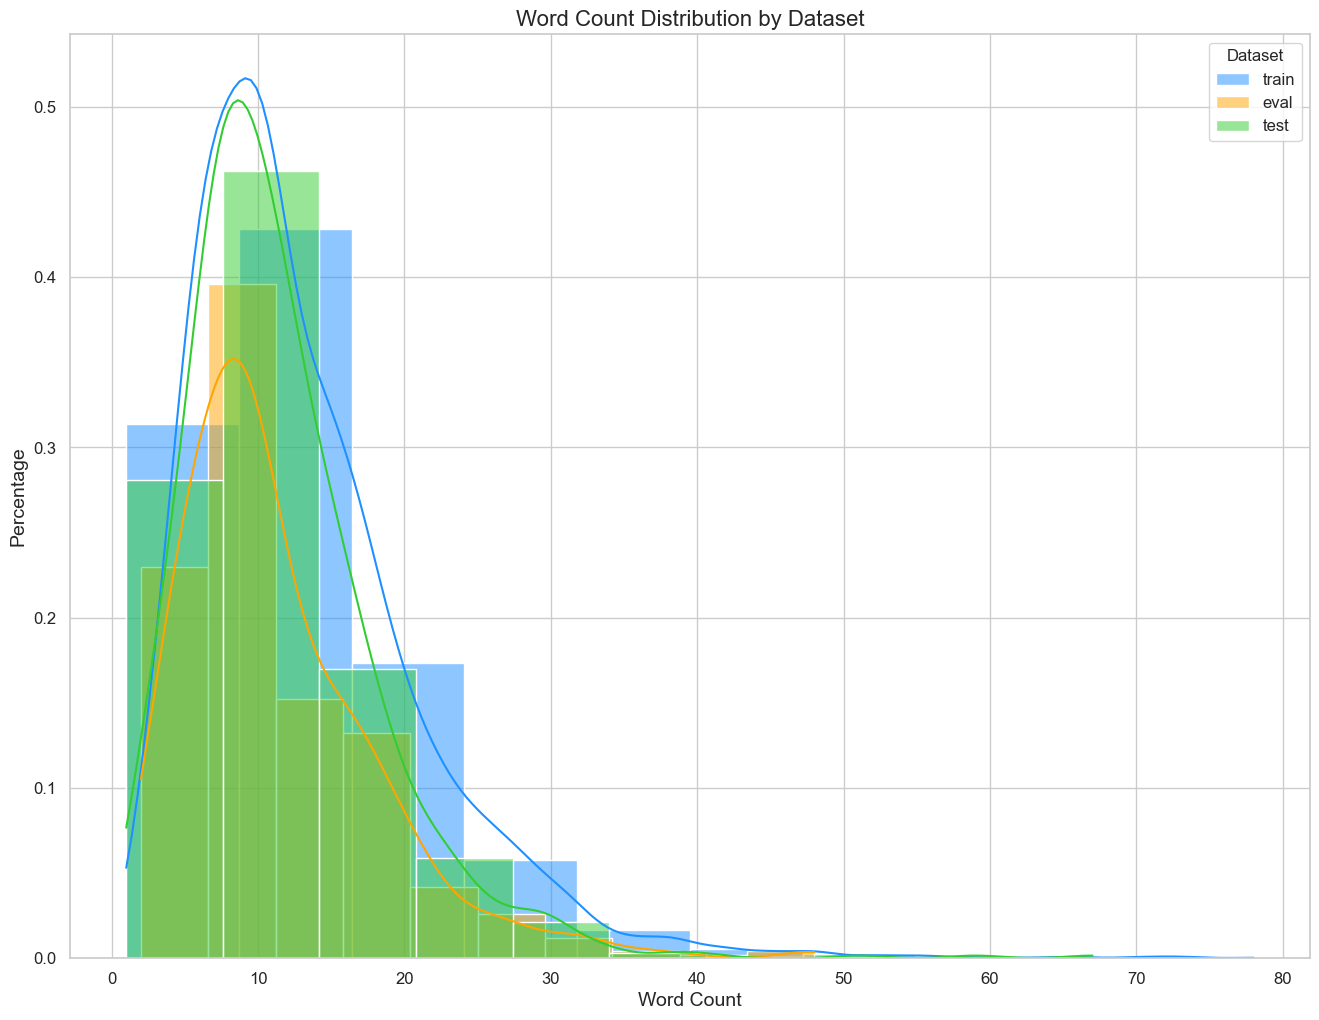

In [25]:
# Create the distplot for each level
fig, ax = plt.subplots(figsize=(16, 12))

color_map = {"train": "dodgerblue", "eval": "orange", "test": "limegreen"}

for dataset in df["dataset"].unique():
    dataset_df = df[df["dataset"] == dataset]
    total_samples = len(dataset_df)
    sns.histplot(data=dataset_df, 
                 x="word_count", 
                 kde=True, 
                 label=dataset, 
                 ax=ax, 
                 alpha=.5, 
                 color=color_map[dataset],
                 weights=[1/total_samples] * total_samples)

# Customize the plot
ax.set_title("Word Count Distribution by Dataset", fontsize=16)
ax.set_xlabel("Word Count", fontsize=14)
ax.set_ylabel("Percentage", fontsize=14)
ax.legend(title="Dataset", fontsize=12)
ax.tick_params(axis="both", which="major", labelsize=12)

# Show the plot
plt.show()


#### Word Count by Label

/opt/anaconda3/envs/amd_gpu/lib/python3.8/site-packages/seaborn/distributions.py:416: UserWarning: `bins` cannot be 'auto' when using weights. Setting `bins=10`, but you will likely want to adjust.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/envs/amd_gpu/lib/python3.8/site-packages/seaborn/distributions.py:416: UserWarning: `bins` cannot be 'auto' when using weights. Setting `bins=10`, but you will likely want to adjust.
  warnings.warn(msg, UserWarning)


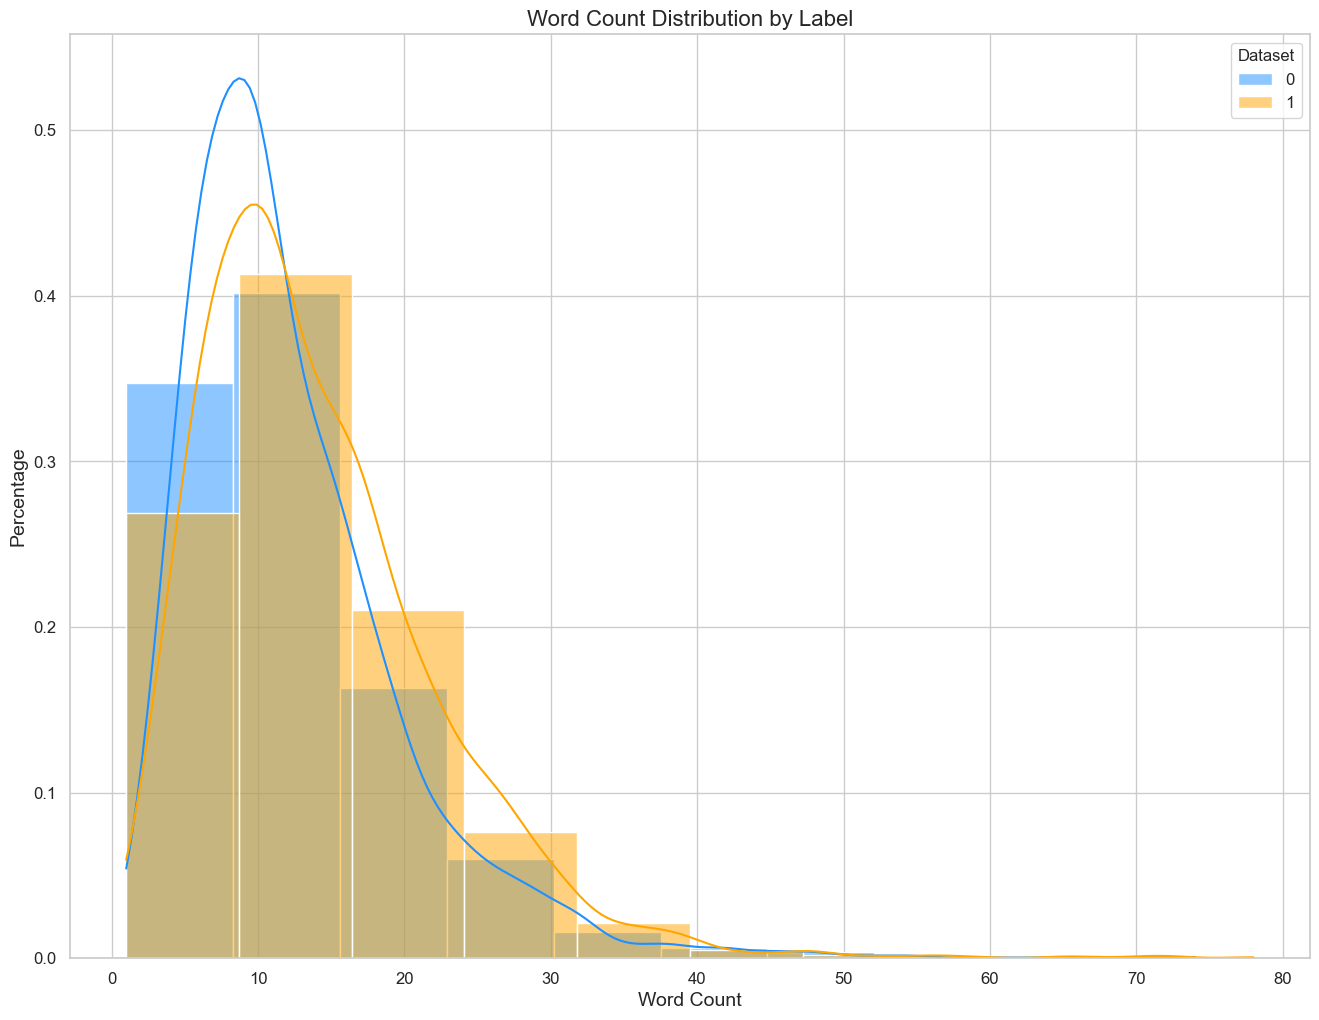

In [26]:
# Create the distplot for each level
fig, ax = plt.subplots(figsize=(16, 12))

color_map = {"0": "dodgerblue", "1": "orange"}

for label in [0, 1]:
    dataset_df = df[df["label"] == label]
    total_samples = len(dataset_df)
    sns.histplot(data=dataset_df, 
                 x="word_count", 
                 kde=True, 
                 label=str(label), 
                 ax=ax, 
                 alpha=.5, 
                 color=color_map[str(label)],
                 weights=[1/total_samples] * total_samples)

# Customize the plot
ax.set_title("Word Count Distribution by Label", fontsize=16)
ax.set_xlabel("Word Count", fontsize=14)
ax.set_ylabel("Percentage", fontsize=14)
ax.legend(title="Dataset", fontsize=12)
ax.tick_params(axis="both", which="major", labelsize=12)

# Show the plot
plt.show()


### Word Cloud by Label

Language Level 0


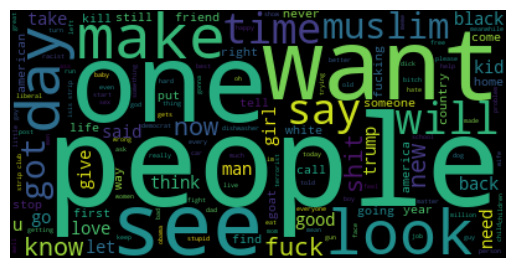

--------------------
Language Level 1


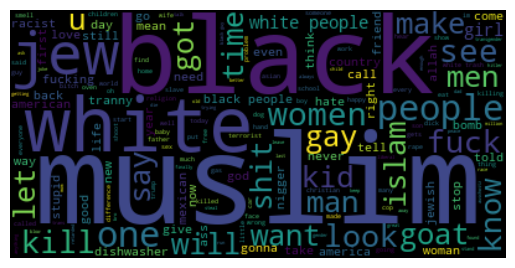

--------------------


In [27]:
from wordcloud import WordCloud

# Create a WordCloud for each level
for label in [0, 1]:
    print("Language Level {}".format(label))
    text = ' '.join(df[df['label'] == label]['text'])
    wordcloud = WordCloud().generate(text)
    plt.figure()
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()
    print("-"*20)